In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
from statistics import median
import pandas as pd
import numpy as np
from pprint import pprint

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)



# def make_hist_plot(data, title, fname):
#     x = plt.hist(data, color = 'blue', edgecolor = 'black', bins = 500)
#     plt.title(title)
#     plt.xlabel('Time (s)')
#     plt.ylabel('MPI Ranks')
#     med = median(data)
#     min_ylim, max_ylim = plt.ylim()
#     plt.axvline(med, color='red', linestyle='dashed', linewidth=1)
#     plt.text(med, max_ylim*0.9, '   Median: {:.2f}'.format(med))
#     plt.savefig(fname)
#     plt.clf()

# def make_stats(run_name, timing_dict):
#     data = dict()
#     for k, v in timing_dict.items():
#         if len(v) > 1:
#             array = np.array(v)
#             arr_min = np.min(array)
#             arr_max = np.max(array)
#             arr_mean = np.mean(array)
#             arr_std = np.std(array)

#             data["_".join((k, "min"))] = arr_min
#             data["_".join((k, "mean"))] = arr_mean
#             data["_".join((k, "max"))] = arr_max
#             data["_".join((k, "std"))] = arr_std
#         else:
#             data[k] = np.float(v[0])
#         data["Name"] = run_name
#     return data



In [ ]:
nnodes = 512
DB_nodes = [16, 32, 64]
sizes = [1024, 1024000, 131076, 16384, 2048000, 262152, 32769, 4096000, 524304, 65538, 8192]
sizes.sort()

df_dbs = dict()

for DB_node in DB_nodes:

    dfs = dict()

    for size in sizes:
        path = f'./throughput-data/{DB_node}-db-log-scale-throughput'
        if DB_node == 32:
            path += "-no-huge"
        path += f'/throughput-sess-{nnodes}-32-{size}'
        files = os.listdir(path)

        function_times = {'loop_time': []}
        #function_rank_times = {}

        for file in files:
            if '.csv' in file and 'rank_' in file:
                fp = os.path.join(path, file)
                with open(fp) as f:
                    for i, line in enumerate(f):
                        vals = line.split(',')
                        if vals[1] in function_times.keys():
                            speed = size*10*32*nnodes/float(vals[2])/1e9
                            #function_times[vals[1]].append(float(vals[2]))
                            function_times[vals[1]].append(speed)
#                         else:
#                             function_times[vals[1]] = [float(vals[2])]
        #function_times = {'loop_time': function_times['loop_time']}
        speed = function_times['loop_time']
        speed.sort()
        #function_times['loop_time'] = speed[:-4]
        speed = function_times['loop_time']
        print(min(speed), max(speed))
        data_df = pd.DataFrame(function_times)
        dfs[size] = data_df

        print(f"Completed {size} size for {DB_node} DB nodes")

    df_dbs[DB_node] = dfs

0.055018630077688174 4.205965038068044
Completed 1024 size for 16 DB nodes
0.442394839628332 37.37874483046717
Completed 8192 size for 16 DB nodes
2.215252657291873 60.00099601014786
Completed 16384 size for 16 DB nodes
1.7612043524329075 90.78718972418235
Completed 32769 size for 16 DB nodes
6.545131216589356 67.88737383827527
Completed 65538 size for 16 DB nodes
18.584971259941327 60.62481464334512
Completed 131076 size for 16 DB nodes
13.142895862913097 56.83805519053877
Completed 262152 size for 16 DB nodes
11.737887277870012 43.19872838730118
Completed 524304 size for 16 DB nodes
13.935490730281082 19.724558093054696
Completed 1024000 size for 16 DB nodes
13.235626942678174 19.36562550499804
Completed 2048000 size for 16 DB nodes
11.492030961024726 14.39363074811256
Completed 4096000 size for 16 DB nodes
0.15649804111786872 4.07994319231929
Completed 1024 size for 32 DB nodes
1.2914740103535207 37.91857567033843
Completed 8192 size for 32 DB nodes
2.442520595808955 73.716841689002

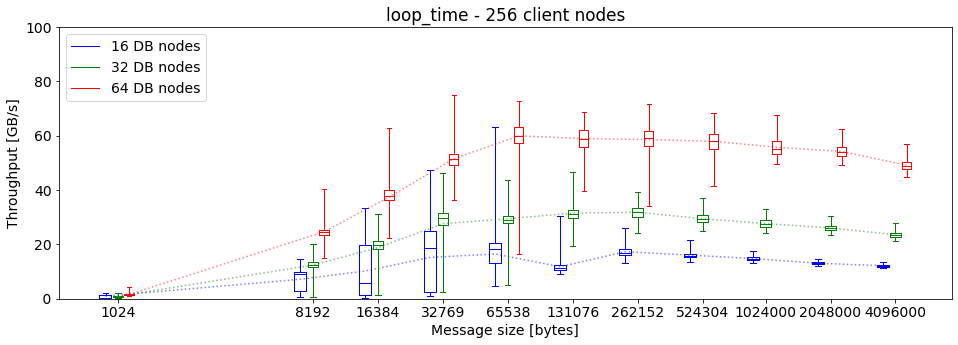

In [117]:
save = True

labels = ["loop_time"]
black_dot = dict(markerfacecolor='k', marker='.')


# Set subplot_index to None to plot to separate files
subplot_index = None
if subplot_index:
    plt.figure(figsize=(8*2,5*2+3))
for label in labels:
    if subplot_index:
        ax = plt.subplot(2,2,subplot_index)
    else:
        fig, ax = plt.subplots(figsize=(8*2,5))

    whiskers = 1e9
    widths = ranks/9
    spacing = ranks/8
        
    DB_node = 16
    dfs = df_dbs[DB_node]
    ranks = np.asarray(sizes)
    data_list = [dfs[size][label] for size in sizes]
    props_dict = dict(color='b')
    plt_4 = ax.boxplot(data_list, showfliers=True, positions=ranks-spacing, whis=whiskers, labels=sizes,
                boxprops=props_dict, whiskerprops=props_dict, medianprops=props_dict, capprops=props_dict, widths=widths)
    means = [np.mean(dfs[size][label]) for size in sizes]
    ax.plot(ranks-spacing, means, props_dict['color']+':', alpha=0.5)

    DB_node = 32
    dfs = df_dbs[DB_node]
    #ranks = [(node-5)*48 for node in nnodes]    
    data_list = [dfs[size][label] for size in sizes] 
    props_dict = dict(color='g')
    plt_8 = ax.boxplot(data_list, showfliers=True, positions=ranks, whis=whiskers, labels=['']*len(ranks),
                boxprops=props_dict, whiskerprops=props_dict, medianprops=props_dict, capprops=props_dict, widths=widths)
    means = [np.mean(dfs[size][label]) for size in sizes]
    ax.plot(ranks, means, props_dict['color']+':', alpha=0.5)

    DB_node = 64
    dfs = df_dbs[DB_node]
    #ranks = [(node+5)*48 for node in nnodes]    
    data_list = [dfs[size][label] for size in sizes] 
    props_dict = dict(color='r')
    plt_16 = ax.boxplot(data_list, showfliers=True, positions=ranks+spacing, whis=whiskers, labels=['']*len(ranks),
                boxprops=props_dict, whiskerprops=props_dict, medianprops=props_dict, capprops=props_dict, widths=widths)
    means = [np.mean(dfs[size][label]) for size in sizes]
    ax.plot(ranks+spacing, means, props_dict['color']+':', alpha=0.5)

    ax.set_ylim([0, 100])

    
        
    ax.legend([plt_4["whiskers"][0], plt_8["whiskers"][0], plt_16["whiskers"][0] ],  [f'{db_node} DB nodes' for db_node in DB_nodes],
              loc='upper left')
    
    #ranks = [node*48 for node in nnodes]
    plt.title(f"{label} - {nnodes} client nodes")
    plt.xlabel("Message size [bytes]")
    plt.ylabel("Throughput [GB/s]")
    plt.xscale("log")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='minor',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True)
    ax.set_xticks(ranks, minor=False)
    #plt.yscale("log")
    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%2.0f'))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))

    plt.draw()

    
    if not subplot_index:
        if save:
            plt.savefig(f"{label}-{nnodes}.pdf")
    else:
        subplot_index += 1

if subplot_index and save:
    plt.savefig(f'all_in_one.pdf')

In [241]:
op = np.mean
labels = ["put_tensor", "run_script", "run_model", "unpack_tensor", "loop_time"]

nnodes=[nnodes[-1]]

table = np.zeros((2,5))

for label_index, label in enumerate(labels):
    dfs4 = df_dbs[4]
    dfs8 = df_dbs[8]
    dfs16 = df_dbs[16]
    ranks = [node*48 for node in nnodes]

    data_4 = (np.asarray([dfs4[node][label] for node in nnodes]))
    data_8 = (np.asarray([dfs8[node][label] for node in nnodes]))
    data_16 = (np.asarray([dfs16[node][label] for node in nnodes]))

    print(label)
    for index, vector in enumerate(data_4):
        print(ranks[index], "nodes")
        print(label_index)
        table[0,label_index] = 0.5/(op(data_8[index])/op(vector))*100
        print("efficiency compared to 4 DB nodes: {:2.2f}%".format(0.5/(op(data_8[index])/op(vector))*100))
        table[1,label_index] = 0.25/(op(data_16[index])/op(vector))*100
        print("efficiency compared to 4 DB nodes: {:2.2f}%".format(0.25/(op(data_16[index])/op(vector))*100))

put_tensor
7680 nodes
0
efficiency compared to 4 DB nodes: 95.98%
efficiency compared to 4 DB nodes: 111.48%
run_script
7680 nodes
1
efficiency compared to 4 DB nodes: 99.17%
efficiency compared to 4 DB nodes: 72.10%
run_model
7680 nodes
2
efficiency compared to 4 DB nodes: 73.19%
efficiency compared to 4 DB nodes: 65.54%
unpack_tensor
7680 nodes
3
efficiency compared to 4 DB nodes: 162.54%
efficiency compared to 4 DB nodes: 158.39%
loop_time
7680 nodes
4
efficiency compared to 4 DB nodes: 88.77%
efficiency compared to 4 DB nodes: 76.56%


In [242]:
print(table)
pd_table = pd.DataFrame(table, columns=labels)

latex_table = ''
for i in range(table.shape[0]):
    for j in range(table.shape[1]):
        latex_table += ( '& ' if j!=0 else '' )+str(table[i,j] ) + ' '
    if i < table.shape[0]-1:
        latex_table += '\\\\\n'

print(latex_table)

[[ 95.98482413  99.17025978  73.18740397 162.54399744  88.77137651]
 [111.476984    72.10185489  65.54072689 158.38611232  76.55559854]]
95.98482413389941 & 99.17025978003096 & 73.18740396861615 & 162.54399743750093 & 88.77137650516272 \\
111.4769839985916 & 72.1018548852138 & 65.54072688964456 & 158.38611232125737 & 76.5555985423348 


In [54]:
# def plot_min_mean_max(df, label, subplot_index=None):
#     if subplot_index:
#         plt.subplot(2,2,subplot_index)
#     else:
#         plt.figure(figsize=(8,5))
#     ranks = df["nodes"]*df["tasks"]
#     minima = df[label+"_min"]
#     maxima = df[label+"_max"]
#     average = df[label+"_mean"]
#     plt.plot(ranks, minima, "b:")
#     plt.plot(ranks, average, "b.-")
#     plt.plot(ranks, maxima, "b:")
#     plt.fill_between(ranks, minima, maxima,
#                  color='b', alpha=0.1)
#     plt.gca().set_rasterized(True)
#     plt.title(label)
#     plt.xlabel("MPI Ranks")
#     plt.ylabel("Time [s]")
#     plt.ylim([-0.5, 8.0])
#     plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%1.1f'))


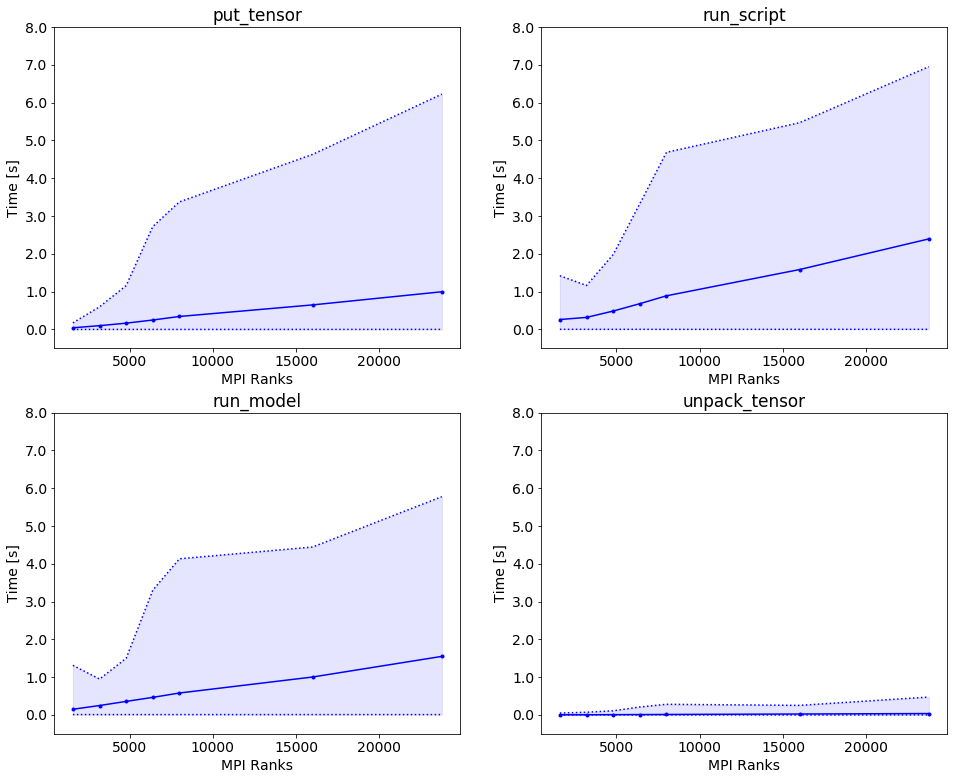

In [18]:
# df = pd.read_csv("./20_40_60_80_100_200_297/infer-resnet.csv")
# df = pd.read_csv("../infer-resnet_16/infer-resnet_16.csv")

# labels = ["put_tensor", "run_script", "run_model", "unpack_tensor"]

# subplot_index = 1
# if subplot_index:
#     plt.figure(figsize=(8*2,5*2+3))
# for label in labels:
#     plot_min_mean_max(df, label, subplot_index)
#     if subplot_index:
#         subplot_index += 1
# if subplot_index:
#     plt.savefig("all_in_one"+".pdf")